<a href="https://colab.research.google.com/github/Rahul4269/Assignments/blob/main/ExcelR_final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df=pd.read_csv("/content/final_dataset1.csv")
df.head()

,Unnamed: 0,Medicine_Name,Condition,Review,rating,date,usefulCount
0,184,lyrica,Neuropathic Pain,No Script or health Insurance needed to place ...,10,2/29/2020,12
1,185,lyrica,Nerve Pain after Herpes,After using Lyrica for 3 weeks it really ly wo...,10,2/24/2020,0
2,186,lyrica,Neuropathic Pain,During an excruciating bout of sciatica my doc...,10,2/20/2020,0
3,187,lyrica,Neuropathic Pain,After being on Lyrica (pregabalin) for over tw...,6,12-08-19,14
4,188,lyrica,Neuropathic Pain,I started taking Lyrica about six weeks ago. I...,10,12-01-19,11


In [5]:
df["Review"] = df["Review"].str.lower()

In [6]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Review"] = df["Review"].apply(lambda text: remove_punctuation(text))

In [7]:
!pip install nltk


In [8]:
import nltk

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [11]:
df["Review"] = df["Review"].apply(lambda text: remove_stopwords(text))

In [12]:
df.head()

,Unnamed: 0,Medicine_Name,Condition,Review,rating,date,usefulCount
0,184,lyrica,Neuropathic Pain,script health insurance needed place order 10 ...,10,2/29/2020,12
1,185,lyrica,Nerve Pain after Herpes,using lyrica 3 weeks really ly works mei remmend,10,2/24/2020,0
2,186,lyrica,Neuropathic Pain,excruciating bout sciatica doc prescribed reli...,10,2/20/2020,0
3,187,lyrica,Neuropathic Pain,lyrica pregabalin two years ive experienced po...,6,12-08-19,14
4,188,lyrica,Neuropathic Pain,started taking lyrica six weeks ago taking gab...,10,12-01-19,11


In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()

corpus = []

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
for i in range(len(df["Review"])):
    review = re.sub('[^a-zA-Z]', ' ', df["Review"][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')

In [20]:
tfidf_matrix = tfidf.fit_transform(corpus)

In [33]:
text =df["Review"][0]


In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [35]:
wordcloud1 = WordCloud().generate(text)

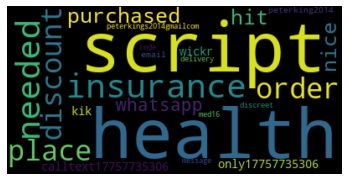

In [37]:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()